## Imports

In [98]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Reading the data

In [6]:
df = pd.read_csv("data/train.csv", index_col="PassengerId")

In [7]:
df.head().T

PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,NaN,C85,NaN,C123,NaN


## Basic Data Attritubes

In [8]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
# null data count (normalised)
df.isnull().sum() / len(df)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

## Understanding distributions of the data

### Convinience plot for quick visualization

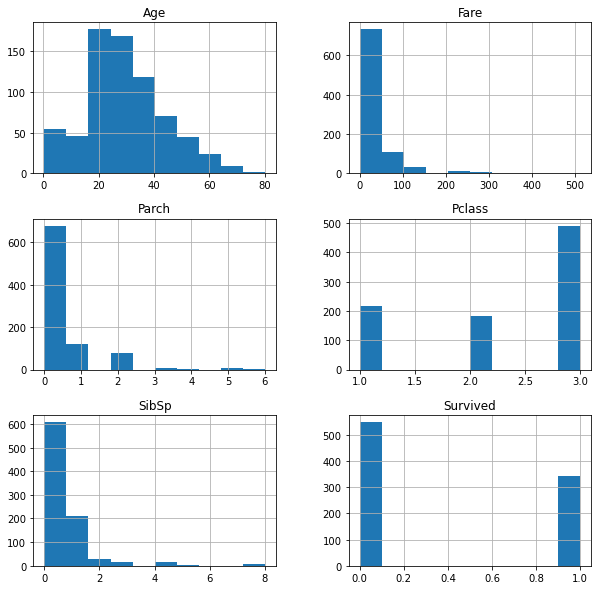

In [15]:
df.hist(figsize=(10,10));

### Exploration of Age variable

The average Age is 29.7
The median Age is 28.0


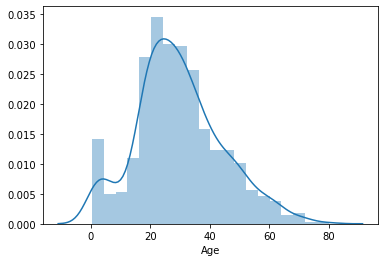

In [22]:
# taking a closer look at some of thes distributions
# Since the age variable has follows the bell curve rather closely
# mean and or median imputation of missing values should work
# However since 20% of the data is missing, 
# further analysis of this variable post imputation is also necessary
print(f"The average Age is {np.round(df.Age.mean(),2)}")
print(f"The median Age is {np.round(df.Age.median(),2)}")
sns.distplot(df.Age.dropna());

In [1]:
# plt.figure(figsize=(10,8))
# sns.violinplot(df.Age, df.Fare)

2499092382720


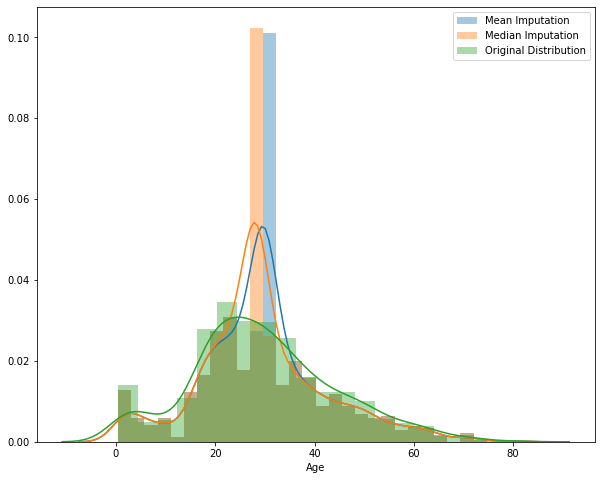

In [53]:
# Imputation by mean and its impact on Age variable
# As can be seen below, the mean and
# median imputation does significantly alter
# the distribution of the data

df2 = df.copy()
mean_age = df2.Age.mean()
median_age = df2.Age.median()

plt.figure(figsize=(10,8))

#imputation
df2['Age_Mean'] = df2.Age.fillna(mean_age)
df2['Age_Median'] = df2.Age.fillna(median_age)

#plots
sns.distplot(df2.Age_Mean,label="Mean Imputation");
sns.distplot(df2.Age_Median, label="Median Imputation");
sns.distplot(df2.Age.dropna(), label="Original Distribution");
plt.legend();

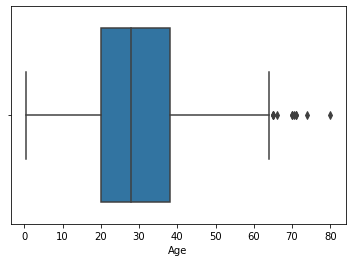

In [85]:
### outlier in Age

# original data
sns.boxplot(df.Age);

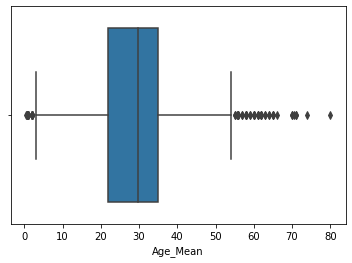

In [86]:
# imputed data
# capping the outlier for mean  imputation is one way to avoid
# or reduce this shift in the data

sns.boxplot(df2.Age_Mean)

### Age v fare

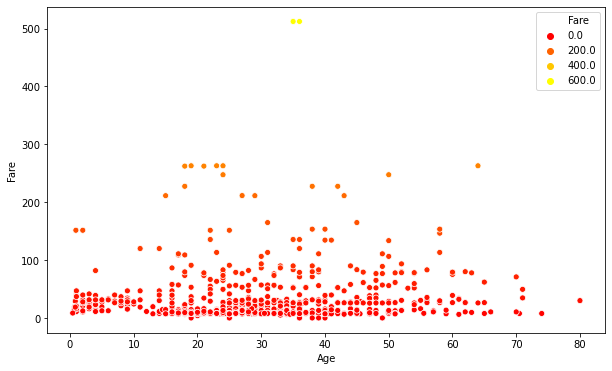

In [103]:
# age v fare
plt.figure(figsize=(10,6))
seaborn.scatterplot("Age",
                    "Fare",
                    data=df,
                    hue=df.Fare,
                    palette=mpl.cm.autumn);

### The Correlation between this and the Target variable

In [36]:
df[["Age", "Survived"]].dropna().corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


In [54]:
# the correlation after imputation seems to have dropped
# however dropped the Age variable will result in the loss of 20 % of data

df2[["Age_Mean", "Survived"]].corr()

,Age_Mean,Survived
Age_Mean,1.000000,-0.069809
Survived,-0.069809,1.000000


In [64]:
# many unfortunate souls who perished in the Titanic have their
# age preserved in this data, so the missing age data seems to 
# be missing at random

df.groupby("Survived")["Age"].count()

Survived
0    424
1    290
Name: Age, dtype: int64

In [65]:
# data preserved of those who did not survive the titanic in
# most of the other columns

df.groupby("Survived").count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


## Exploration of Gender variable

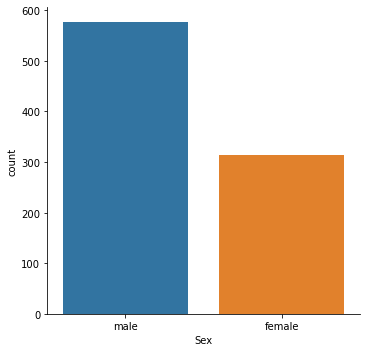

In [122]:
# There is almost a 2 : 1 ration of males to females on the titanic

sns.catplot('Sex',data=df,kind='count');

In [75]:
# converting the categories of Male and Female into binary values
sex_mapping = {"male":0, "female":1}

df2["Gender"] = df2.Sex.map(sex_mapping)

# As can be seen, even though the gender ration is 2 : 1 (2 males for every female)
# the survival ratio of women to men is more than 3 : 1
# This lays credence to the theory that women were given preferential 
# treatment in terms of occupancy of the life boats

df2.groupby("Gender")["Survived"].mean()

Gender
0    0.188908
1    0.742038
Name: Survived, dtype: float64

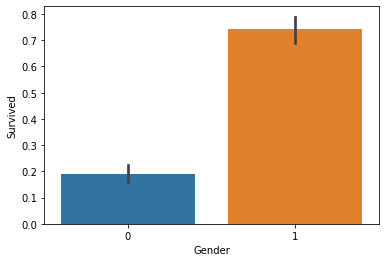

In [106]:
seaborn.barplot(df2.Gender, df2.Survived);

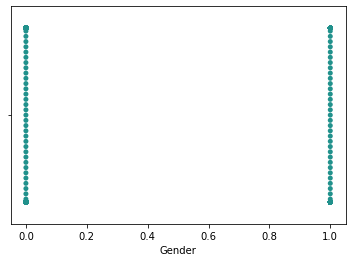

In [119]:
sns.swarmplot(df2.Gender, hue=df2.Fare, palette="viridis")

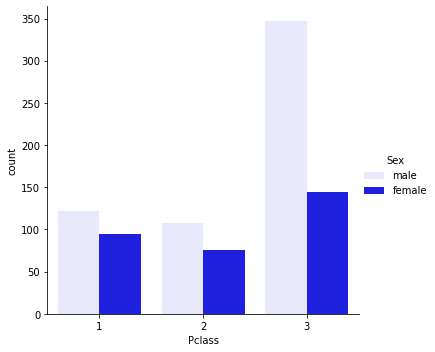

In [128]:
sns.catplot('Pclass',data=df2,hue='Sex',kind='count',color="blue");

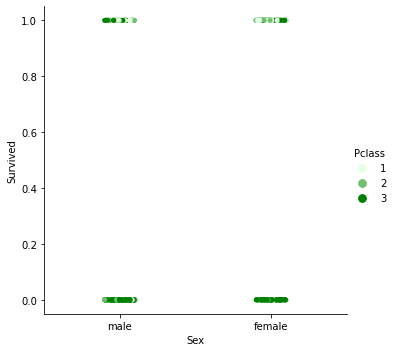

In [139]:
# This plot shows the four realities of the titanic dataset
# 1. 
sns.catplot('Sex',
            "Survived",
            data=df2,
            hue='Pclass',
            color="green", 
            height=5);

### Age vs PClass Vs Survived

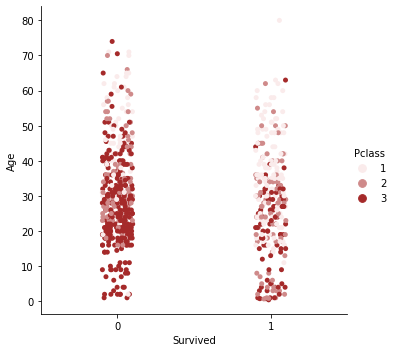

In [143]:
sns.catplot('Survived',
            "Age",
            data=df2,
            hue='Pclass',
            color="brown", 
            height=5);

## Survivability based on Family Information

In [ ]:
# merge 
# do a group by and calculate both statistics


## Survivability based on Cabin Information

In [166]:
def retrieve_cabin(x):
    if not isinstance(x, float):
        return x[0]  
    return "Missing"

df2['Cabin_Initial'] = df.Cabin.apply(retrieve_cabin)

In [169]:
# It is abundantly clear that missing data in the Cabin column is
# NOT missing by random

df2.groupby(['Cabin_Initial'])['Survived'].value_counts(dropna=False)

Cabin_Initial  Survived
A              0             8
               1             7
B              1            35
               0            12
C              1            35
               0            24
D              1            25
               0             8
E              1            24
               0             8
F              1             8
               0             5
G              0             2
               1             2
Missing        0           481
               1           206
T              0             1
Name: Survived, dtype: int64

In [170]:
# further exploration on the Pclass, Cabin info, Sex vs Survivability

df2.groupby(['Cabin_Initial',
             'Pclass',
             'Sex'])['Survived'].value_counts(dropna=False)

Cabin_Initial  Pclass  Sex     Survived
A              1       female  1             1
                       male    0             8
                               1             6
B              1       female  1            27
                       male    0            12
                               1             8
C              1       female  1            24
                               0             3
                       male    0            21
                               1            11
D              1       female  1            16
                       male    0             7
                               1             6
               2       female  1             2
                       male    0             1
                               1             1
E              1       female  1            10
                       male    1             8
                               0             7
               2       female  1             3
                    

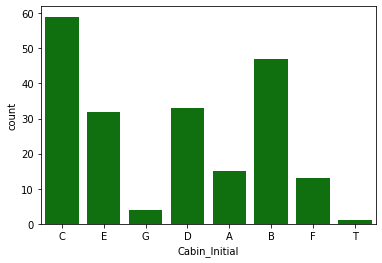

In [164]:
sns.countplot('Cabin_Initial',
            #"Survived",
            data=df2,
            #hue='Cabin_Initial',
            color="green",
             )

##  Preliminary Data Synopsis

- Name column seems to be irrelevant
- Cabin column has a lot of missing values, so it either has to be feature engineered or dropped
- Age and 